In [51]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [52]:
#Reading the .csv file
df=pd.read_csv(r"C:\Users\seela\genai,ds internship\EDA Assignments\ELECTRIC VEHICLE DATASET.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [53]:
#shape of the data
shape=df.shape
print("The Number of rows : {}".format(shape[0]))
print("The Number of columns : {}".format(shape[1]))



The Number of rows : 112634
The Number of columns : 17


In [54]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

# Exploratory data Analysis

Getting the insights from the data which includes :

- Missing values.
- Duplicated Values.
- Outliers.
- Relationships.
- Distributions.

In [55]:
# Checking the Missing values
df.isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

Insights:
- There are 20 missing values in Model column.
- 286 missing values in Legislative District.
- 443 Missing values in Electric Utility.


In [56]:
# Checking the Duplicated values
df.duplicated().sum()


0


Insights:
- There are no duplicated values in the data.

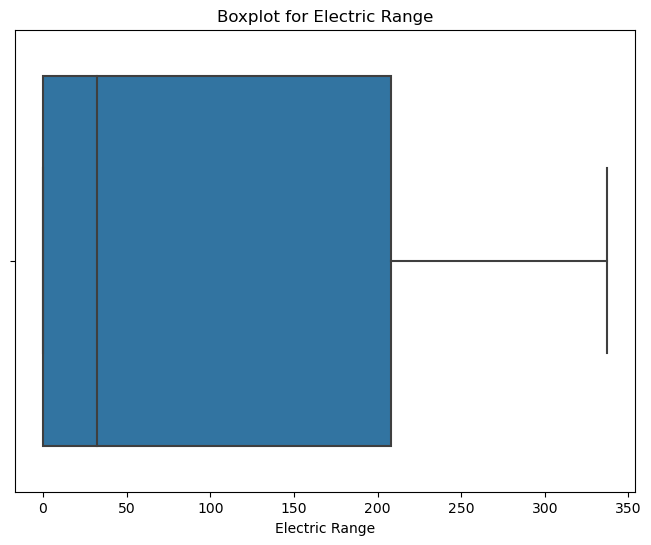

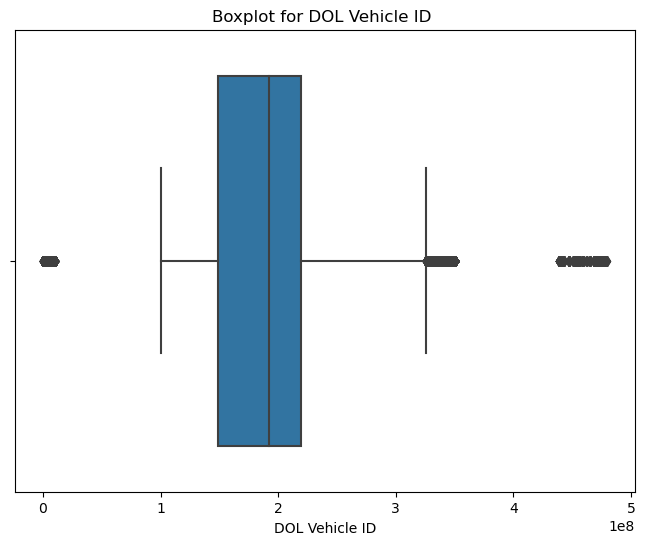

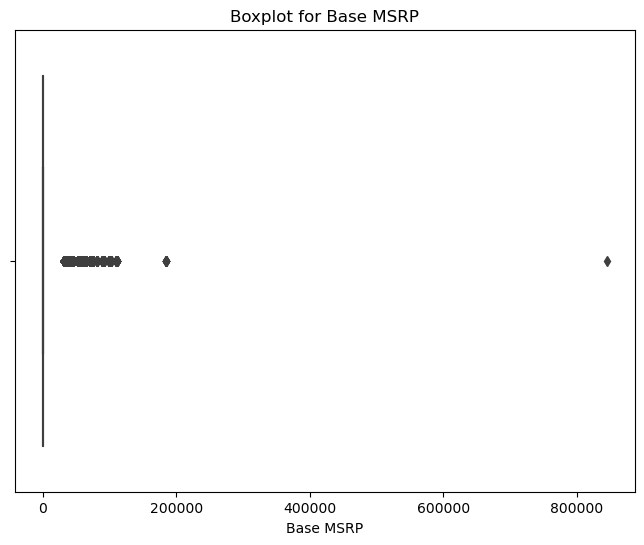

In [57]:
# Checking the outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=df["Electric Range"])
plt.title("Boxplot for Electric Range")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=df["DOL Vehicle ID"])
plt.title("Boxplot for DOL Vehicle ID ")
plt.show

plt.figure(figsize=(8,6))
sns.boxplot(x=df["Base MSRP"])
plt.title("Boxplot for Base MSRP")
plt.show()

# Imputing the missing values

In [58]:

Missing_columns=["Model","Legislative District","2020 Census Tract"]
SIM=SimpleImputer(strategy="most_frequent")

In [59]:
df[["Model"]]=SIM.fit_transform(df[["Model"]])
df["Model"].isna().sum()

0

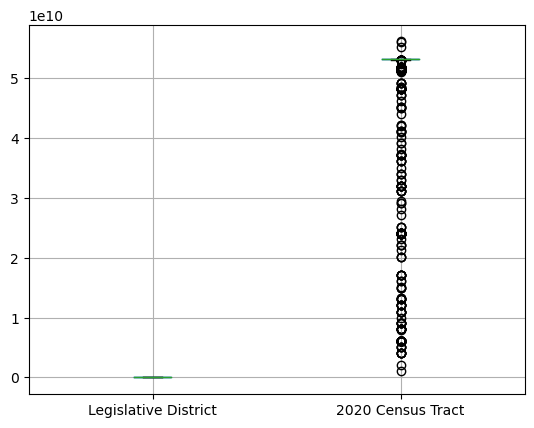

In [60]:
df[["Legislative District","2020 Census Tract"]].boxplot()
plt.show()

In [61]:
SIM=SimpleImputer(strategy="mean")
df[["2020 Census Tract"]]=SIM.fit_transform(df[["2020 Census Tract"]])
df["2020 Census Tract"].isna().sum()

0

In [62]:
SIM=SimpleImputer(strategy="median")
df[["Legislative District"]]=SIM.fit_transform(df[["Legislative District"]])
df["Legislative District"].isna().sum()


0

# Univariate Analysis
Analysing the data using single feature.


In [63]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

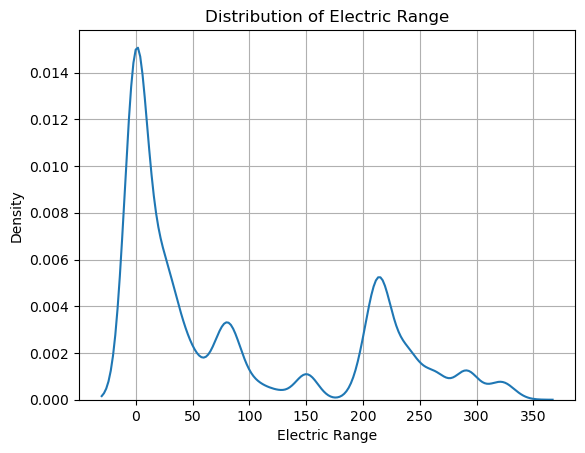

In [64]:
#What is the distribution of Electric Range?
sns.kdeplot(x=df["Electric Range"])
plt.title("Distribution of Electric Range")
plt.grid()
plt.show()


Insights:
- In between 0 to 45 the electric range density is more compared to 5 to 100.
- Above 350 the electric range is decreasing.


In [65]:
#Distribution of City?
d1=pd.DataFrame(df["City"].value_counts())
d1

,count
City,
Seattle,20305
Bellevue,5921
Redmond,4201
Vancouver,4013
Kirkland,3598
...,...
Hartline,1
Gaithersburg,1
El Paso,1


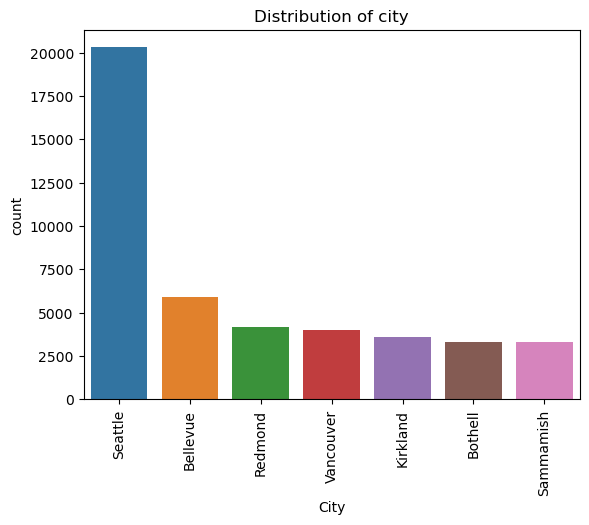

In [66]:
sns.barplot(x=d1.index[:7], y=d1["count"][:7])  # Remove 'hue' if not needed
plt.title("Distribution of city")
plt.xticks(rotation=90)
plt.show()


Insights:
- Seattle is ranked more in distribution of cities.
- Worley is less compared to other cities.

In [67]:
#Distribution of Make?
d2=pd.DataFrame(df["Make"].value_counts())
d2


,count
Make,
TESLA,52078
NISSAN,12880
CHEVROLET,10182
FORD,5819
BMW,4680
KIA,4483
TOYOTA,4405
VOLKSWAGEN,2514
AUDI,2332


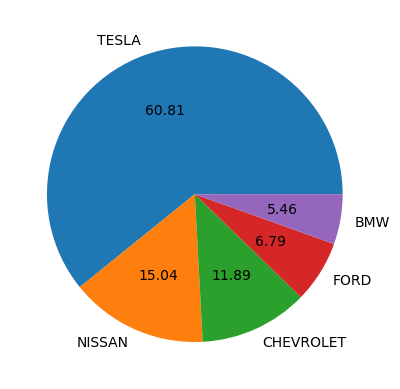

In [68]:
plt.pie(x=d2["count"][:5],labels=d2.index[:5],autopct="%0.2f")
plt.show()


Insights:
- Tesla has the highest propotion in the make compared to others.


In [69]:
#Distribution of State?
d3=pd.DataFrame(df["State"].value_counts())
d3


,count
State,
WA,112348
CA,76
VA,36
MD,26
TX,14
CO,9
NV,8
GA,7
NC,7


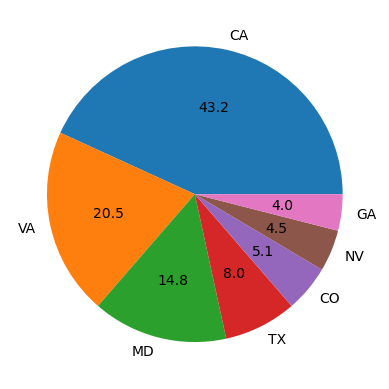

In [70]:
plt.pie(x=d3["count"][1:8],labels=d3.index[1:8],autopct="%0.1f")
plt.show()


# Bivariate Analysis
Analysing the data using two features.

## Which state has more Battery and least plug-in-hybrid electric type vehicles?

In [71]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [72]:
g1=pd.crosstab(index=df["State"],columns=df["Electric Vehicle Type"]).sort_values(by=["Battery Electric Vehicle (BEV)","Plug-in Hybrid Electric Vehicle (PHEV)"],ascending=False)

In [73]:
g1.head()
len(g1)

45

In [74]:
g1.index

Index(['WA', 'CA', 'VA', 'MD', 'TX', 'CO', 'NV', 'IL', 'AZ', 'DC', 'SC', 'GA',
       'NC', 'FL', 'NE', 'AR', 'NY', 'PA', 'TN', 'OR', 'HI', 'UT', 'KS', 'LA',
       'MA', 'MO', 'ID', 'OH', 'WY', 'CT', 'NH', 'DE', 'MN', 'MS', 'NM', 'RI',
       'SD', 'WI', 'NJ', 'AK', 'AL', 'KY', 'ME', 'ND', 'OK'],
      dtype='object', name='State')

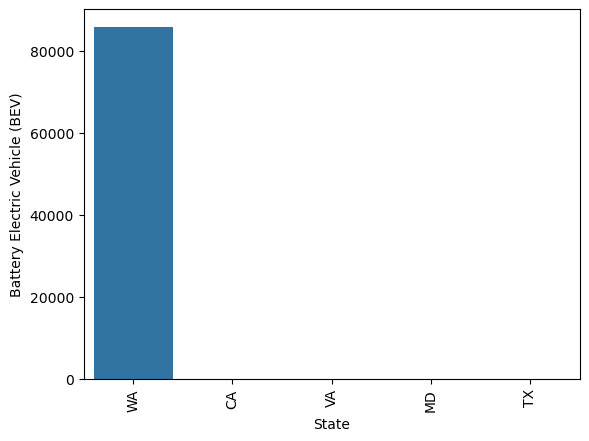

In [75]:
sns.barplot(x=g1.index[:5],y=g1["Battery Electric Vehicle (BEV)"][:5])
plt.xticks(rotation=90)
plt.show()


Insights:
- WA has more Battery Electric vehicles compared to other states.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112634 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

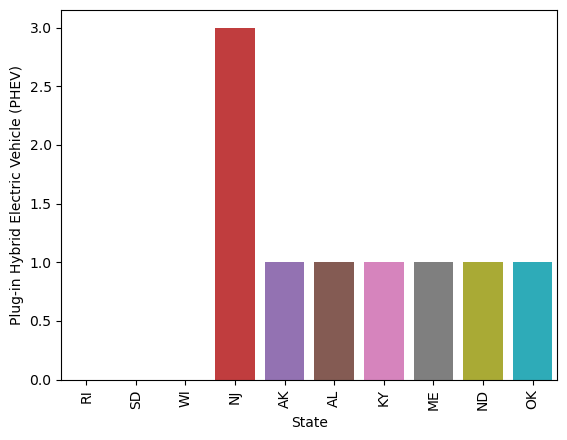

In [76]:

sns.barplot(x=g1.index[35:45],y=g1["Plug-in Hybrid Electric Vehicle (PHEV)"][35:45])
plt.xticks(rotation=90)
plt.show()


Insights:
- OK,ND has less plug-in-hybrid electric vehicles.


In [77]:
#What is the relationship between the Electric Range and Base MSRP of electric vehicles?
df[["Electric Range","Base MSRP"]].corr()



,Electric Range,Base MSRP
Electric Range,1.000000,0.085025
Base MSRP,0.085025,1.000000


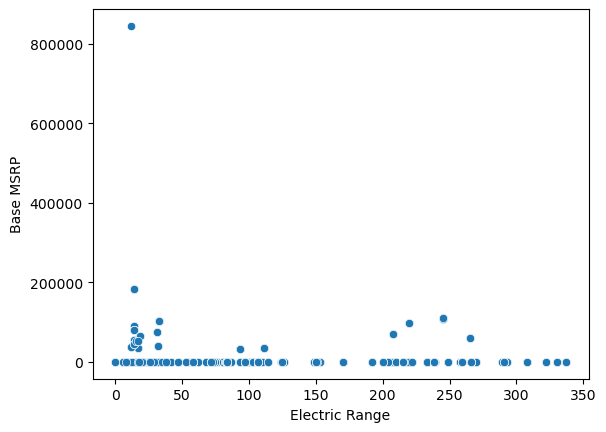

In [78]:
sns.scatterplot(x=df["Electric Range"],y=df["Base MSRP"])
plt.show()


Insights:
- Since the correlation is minimal, Electric Range is not a reliable predictor of the Base MSRP

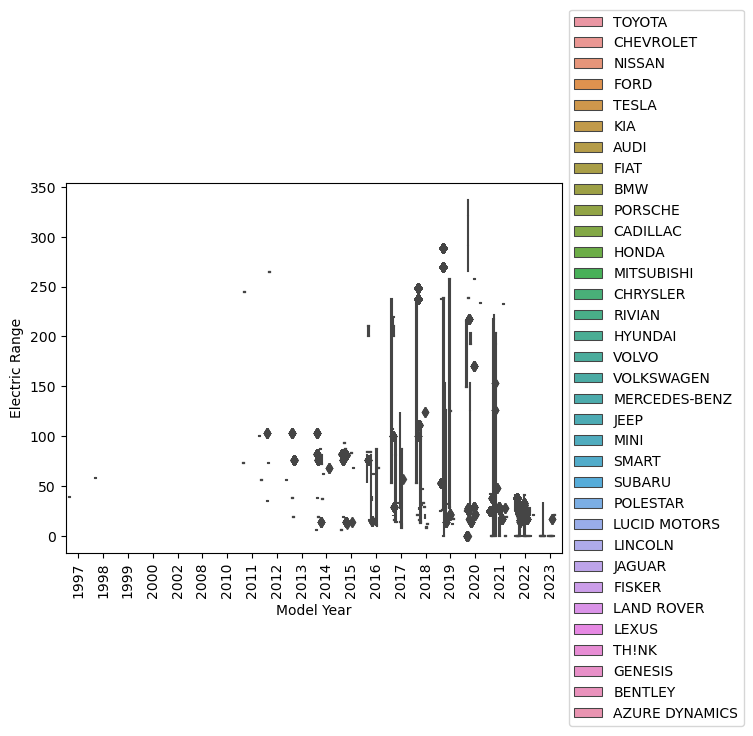

In [79]:
#How does Model Year influence the Electric Range across different Make
sns.boxplot(x=df["Model Year"],y=df["Electric Range"],hue=df["Make"])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.show()


In [81]:

#Create a Choropleth using plotly.express to display the number of EV vehicles based on location.
state_data = df.groupby('State')['VIN (1-10)'].count().reset_index()
state_data.columns = ['State', 'EV Count']

fig = px.choropleth(state_data, 
                    locations='State', 
                    locationmode='USA-states', 
                    color='EV Count', 
                    color_continuous_scale='greens', 
                    scope='usa',
                    labels={'EV Count': 'Number of EV Vehicles'},
                    title='Number of Electric Vehicles by State'
                  )

fig.show()



In [82]:
!pip install bar-chart-race

In [83]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [84]:


# Step 1: Group the data by 'Make' to calculate the total EV count for each make
total_ev_by_make = df.groupby('Make')['Make'].count().sort_values(ascending=False).head(10).index

# Step 2: Filter the DataFrame to include only the top 10 car makes
filtered_df = df[df['Make'].isin(total_ev_by_make)]

# Step 3: Group the filtered data by 'Model Year' and 'Make', and count the number of EVs
ev_make_by_year = filtered_df.groupby(['Model Year', 'Make']).size().reset_index(name='EV Count')

# Step 4: Create a list of the top 10 unique makes
unique_makes = filtered_df['Make'].unique()

# Step 5: Create a DataFrame of all years
all_years = pd.DataFrame({'Model Year': sorted(filtered_df['Model Year'].unique())})

# Step 6: Generate all combinations of 'Model Year' and the top 10 'Make'
all_combinations = all_years.assign(key=1).merge(pd.DataFrame({'Make': unique_makes, 'key':1}), on='key').drop('key', axis=1)

# Step 7: Merge the combinations with the grouped data, filling in missing values with 0
ev_make_by_year_full = all_combinations.merge(ev_make_by_year, on=['Model Year', 'Make'], how='left').fillna(0)

# Step 8: Convert 'EV Count' to integer
ev_make_by_year_full['EV Count'] = ev_make_by_year_full['EV Count'].astype(int)

# Step 9: Create the animated racing bar plot with increased height
fig = px.bar(
    ev_make_by_year_full,  # Data
    x='EV Count',  # X-axis: count of EVs
    y='Make',  # Y-axis: car Make
    color='Make',  # Color by car Make
    animation_frame='Model Year',  # Animation by year
    orientation='h',  # Horizontal bar chart
    title='Top 10 Electric Vehicle Makes Over the Years',  # Chart title
    labels={'EV Count':'Number of EVs', 'Make':'Car Make'},  # Axis labels
    range_x=[0, ev_make_by_year_full['EV Count'].max() * 1.1],  # Dynamically set x-axis range
    height=800  # Set height for better visibility
)

# Step 10: Show the plot
fig.show()


In [90]:
ev_make_by_year_full

,Model Year,Make,EV Count
0,1997,TOYOTA,0
1,1997,CHEVROLET,1
2,1997,NISSAN,0
3,1997,FORD,0
4,1997,TESLA,0
...,...,...,...
195,2023,KIA,79
196,2023,AUDI,12
197,2023,BMW,73
198,2023,VOLVO,21


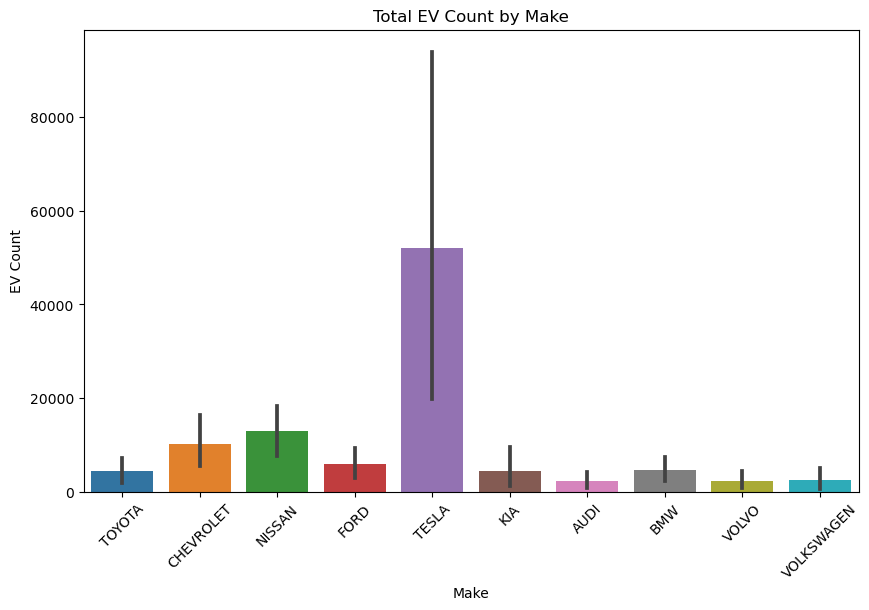

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Make', y='EV Count', data=ev_make_by_year_full, estimator=sum)
plt.xticks(rotation=45)
plt.title('Total EV Count by Make')
plt.show()


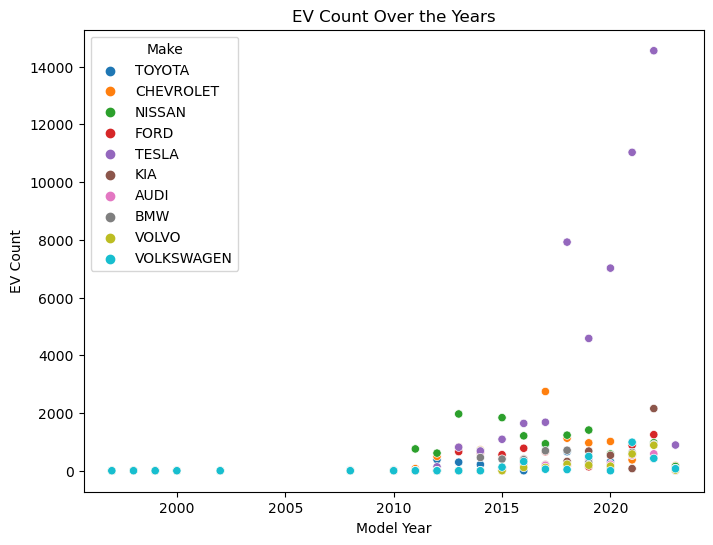

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains columns 'Year' and 'EV_count'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Model Year', y='EV Count',hue='Make' ,data=ev_make_by_year_full)
plt.title('EV Count Over the Years')
plt.show()
